____
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Ciencia de Datos ClusterAI__<br/>
__Modelos de regresion y Ridge Regression__<br/>
__Originalmente creado para el curso de Machine Learning Master OSS Universite de Technologie de Troyes__<br/>
__Fuente: https://github.com/martinepalazzo/Master-OSS-Machine-Learning-practice__<br/>
__Autor: Martin Palazzo__
____

#### **Ridge Regression y Linear Regression**

#### Importamos Librerias

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_context("talk", font_scale=0.85)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn import datasets
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### Importamos el dataset pre-cargado de scikit learn llamado Bostom

In [8]:
# define the independient variables
x = data
# define the dependen variables (labels)
y = target

In [9]:
# Visualizamos los primeros 20 valores de la variable objetivo
y[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

/tmp/ipykernel_17463/2141181047.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


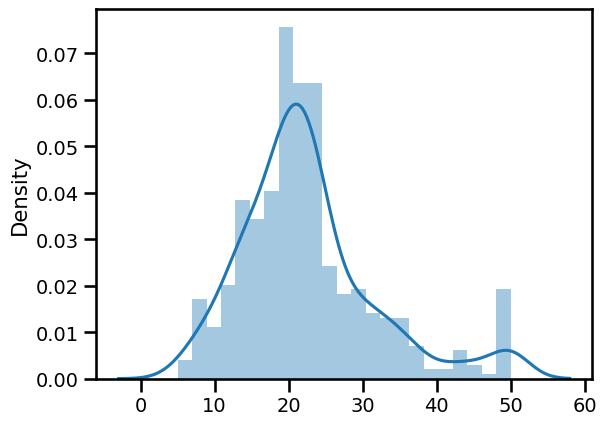

In [56]:
# distplot of label distribution
sns.distplot(y)
plt.show()

In [12]:
# check the dimensionality and samples of the dataset
np.shape(x)

(506, 13)

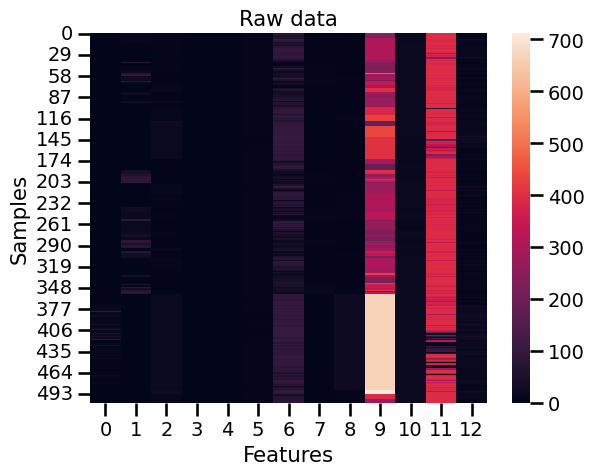

In [13]:
# print the x matrix
sns.heatmap(x)
plt.title('Raw data')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

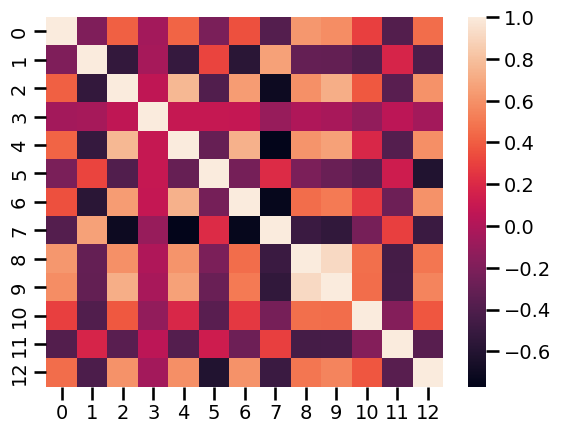

In [14]:
# Feature pairwise linear correlation
sns.heatmap(pd.DataFrame(x).corr())
plt.show()

# **Train-test split**

In [15]:
# train test split
xtr0, xte0, ytr, yte = train_test_split(x,y,test_size=0.3, random_state = 10)

In [16]:
scaler = StandardScaler()

In [17]:
# get the mean and standard deviation of every feature
scaler.fit(xtr0)

StandardScaler()

In [18]:
# scale each feature using the mean and std-dev in the previous step
xtr = scaler.transform(xtr0)
xte = scaler.transform(xte0)

<Axes: >

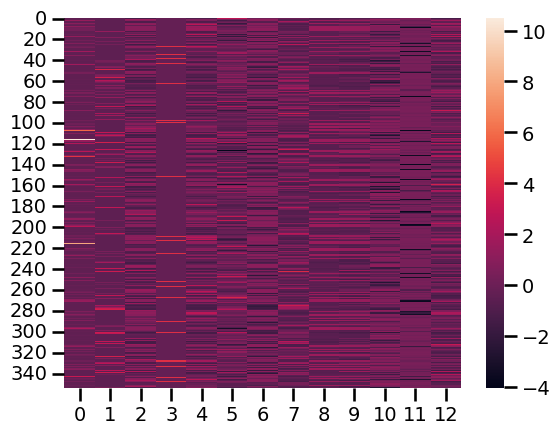

In [19]:
# print the x matrix
sns.heatmap(xtr)

In [20]:
np.mean(xtr, axis = 0)

array([-1.34387166e-16,  7.27603790e-17,  4.64286487e-15,  2.15772158e-16,
       -2.36063523e-15,  1.95951228e-15,  2.05101159e-15, -1.25135307e-16,
       -3.79483011e-17, -5.64520182e-18,  1.90105308e-14,  4.20300957e-15,
        3.91087037e-16])

In [21]:
np.std(xtr)

1.0000000000000002

In [22]:
#xtr

### **Train validation split**

In [23]:
from sklearn.model_selection import KFold

In [24]:
kf = KFold(n_splits=5)
kf.get_n_splits(xtr)

5

In [25]:
train_index, val_index = next(kf.split(xtr))
xtra = xtr[train_index]
xval = xtr[val_index]

ytra = ytr[train_index]
yval = ytr[val_index]

In [26]:
xtra.shape

(283, 13)

In [27]:
xval.shape

(71, 13)

# **Linear Regression**

Calculo de los parametros de regresion $\hat{w}$
$$
\hat{w} = (\mathbf{X}\mathbf{X}^{T})^{-1}\mathbf{X}^{T}y
$$

\hat{w} = (\mathbf{X}\mathbf{X}^{T})^{-1}\mathbf{X}^{T}y

In [28]:
#regresion lineal
def lin_reg(x,y):
  n, m = x.shape
  I = np.identity(m)
  w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
  return w

In [29]:
# Visualize the weights obtained
weights_ols = lin_reg(xtra,ytra)
weights_ols

array([-0.75358976,  2.74032723,  0.43594183,  0.27291687, -0.69509366,
        2.51633168, -1.23015119, -4.23115586,  2.5778356 , -2.62370762,
       -0.9062409 ,  1.57266438, -3.43169149])

In [30]:
# compute the L2 norm of the weights vector
np.linalg.norm(weights_ols, ord = 2)

7.948143322434164

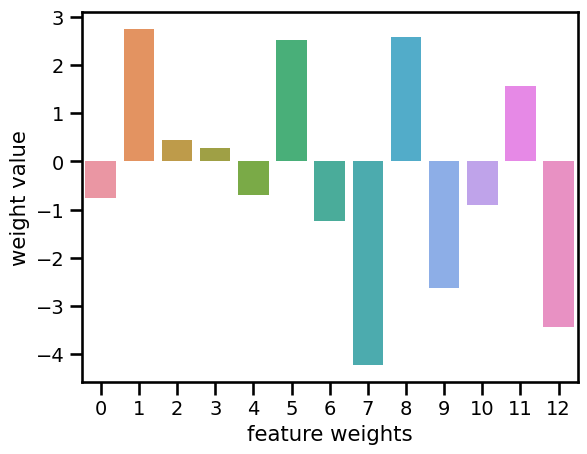

In [31]:
sns.barplot(x = np.arange(0,np.shape(weights_ols)[0]), y = weights_ols)
plt.xlabel('feature weights')
plt.ylabel('weight value')
plt.show()

In [32]:
# compute the estimation of y using the obtained weights
y_pred_val_ols = np.dot(xval, np.asarray(weights_ols))

In [33]:
# calculamos el RMSE
rmse_ols = np.sqrt(np.mean(np.square(yval - y_pred_val_ols)))
rmse_ols

22.467095538142598

### Ridge Regression
$$
\hat{w}^{\text {ridge }}=\underset{w}{\operatorname{argmin}}\left\{\sum_{i=1}^{N}\left(y_{i}-w_{0}-\sum_{j=1}^{d} x_{i j} w_{j}\right)^{2}+\lambda \sum_{j=1}^{d} w_{j}^{2}\right\}
$$

En forma cerrada
$$
\hat{w}^{\text {ridge }} = (\mathbf{X}\mathbf{X}^{T}+\lambda \mathbf{I})^{-1}\mathbf{X}^{T}y
$$

In [34]:
def ridge_reg(x,y,lambd):
  n, m = x.shape
  I = np.identity(m)
  w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x) + lambd * I), x.T), y)
  return w

In [35]:
# select lambda values
lamb = 30

In [36]:
# Visualize the weights obtained
weights = ridge_reg(xtra,ytra, lamb)
weights

array([-0.53761896,  1.94592755,  0.03616543,  0.36180607, -0.30293686,
        2.68252418, -1.01240137, -2.82583646,  1.0571608 , -1.08332124,
       -0.94175696,  1.40971763, -3.02808432])

In [37]:
# compute the L2 norm of the weights vector
np.linalg.norm(weights, ord = 2)

5.902590378379027

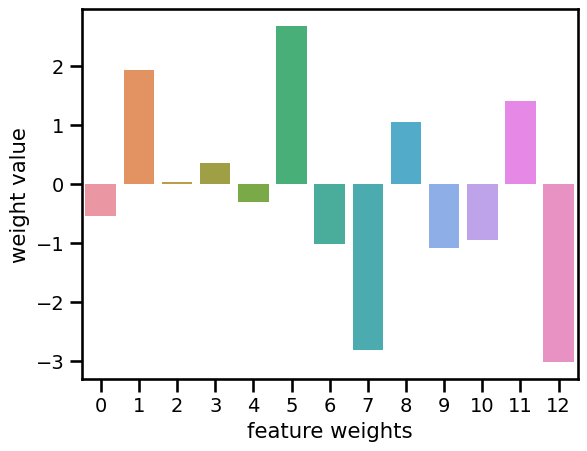

In [38]:
sns.barplot(x = np.arange(0,np.shape(weights)[0]), y = weights)
plt.xlabel('feature weights')
plt.ylabel('weight value')
plt.show()

In [39]:
# change the format of the weights vector
weights_array = np.asarray(weights)
weights_array

array([-0.53761896,  1.94592755,  0.03616543,  0.36180607, -0.30293686,
        2.68252418, -1.01240137, -2.82583646,  1.0571608 , -1.08332124,
       -0.94175696,  1.40971763, -3.02808432])

In [40]:
np.shape(weights_array)

(13,)

In [41]:
# compute the estimation of y using the obtained weights
y_pred_val = np.dot(xval, weights_array)

In [42]:
# check the dimensionality of the estimation of y
np.shape(y_pred_val)

(71,)

In [43]:
# compute the MSE 
RMSE = np.sqrt(np.mean(np.square(yval - y_pred_val)))
RMSE

22.360473245668455

# **Excercise: Ridge Regression Regularization Path**
- Define which value of lambda reduces more the RMSE
- plot a RMSE curve given different values of lambda hyper-parameter



In [44]:
##### Define which value of lambda reduces more the RMSE ###### 
##### plot a RMSE curve given different values of lambda hyper-parameter #####

In [45]:
xtr.shape

(354, 13)

In [46]:
# 
iterations = 1000
rmse = np.zeros(iterations)
weight_path = np.zeros((iterations,xtr.shape[1]))
for i in range(1, iterations+1, 1):
  lamb = i
  weight_path[i-1,:] = ridge_reg(xtra,ytra, lamb)
  y_pred_val_i = np.dot(xval, np.asarray(weight_path[i-1,:]))
  rmse[i-1] = np.sqrt(np.mean(np.square(yval - y_pred_val_i)))

In [47]:
weight_path.shape

(1000, 13)

[]

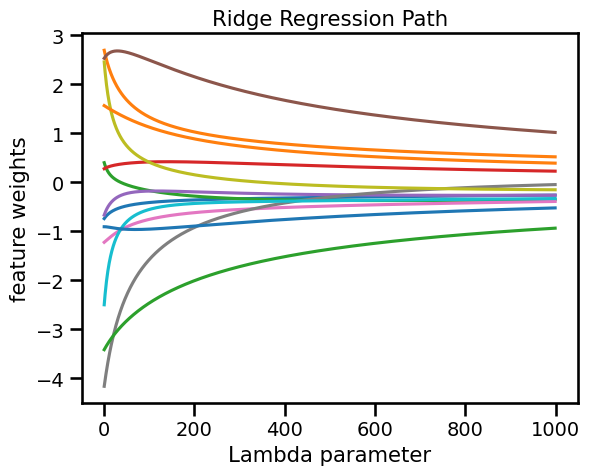

In [48]:
plt.plot(weight_path[:,0])
plt.plot(weight_path[:,1])
plt.plot(weight_path[:,2])
plt.plot(weight_path[:,3])
plt.plot(weight_path[:,4])
plt.plot(weight_path[:,5])
plt.plot(weight_path[:,6])
plt.plot(weight_path[:,7])
plt.plot(weight_path[:,8])
plt.plot(weight_path[:,9])
plt.plot(weight_path[:,10])
plt.plot(weight_path[:,11])
plt.plot(weight_path[:,12])
plt.xlabel('Lambda parameter')
plt.ylabel('feature weights')
plt.title('Ridge Regression Path')
plt.plot()

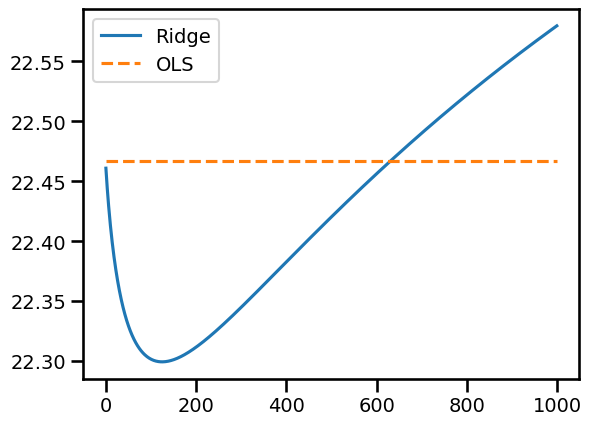

In [49]:
plt.plot(rmse, label = 'Ridge')
plt.plot(np.full((1000),rmse_ols), '--', label = 'OLS')
plt.legend()
plt.show()